In [445]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

pd.options.display.max_seq_items = 500

In [446]:
df = pd.read_csv("../dataset/datarecensomoacyr.csv")

In [447]:
df.shape

(265, 35)

In [448]:
df.head()

,Carimbo de data/hora,Endereço de e-mail,Qual seu nome?,Qual a sua idade? (quantos anos completos você tem agora.),Qual sua turma? (Selecione apenas a opção que contém sua série e turma),Com qual gênero você se identifica?,Qual a sua sexualidade?,Qual sua etnia? (selecione com qual cor de pele você se identifica),"Você possui alguma religião? Se sim, qual?",Em que cidade e estado você nasceu? (Nos diga a cidade de onde você e sua família vieram e a qual estado ela pertence),...,Quantos anos sua mãe tem?,Qantos anos seu pai tem?,Outros,Qual o grau de escolaridade do seu responsável? (o de maior escolaridade),Quantas pessoas na sua casa trabalham?,Qual o trabalho de seu responsável?,"Você recebe algum pagamento? (mesada, trabalho, recompensa, etc.)",Você possui alguma doença diagnosticada?,Alguém da sua família tem doença diagnosticada? Quem e qual doença?,Pontuação
0,06/04/2023 10:31:25,gabrielpaulanascimento3@gmail.com,Pedro Henrique dos Santos,17.0,3A,Masculino,Hetero,Branco,Evangélica,Campinas-SP,...,49,NaN,NaN,Ensino Médio ou Profissionalizante,1,Técnico de enfermagem,Não,Epilepsia,Não,NaN
1,06/04/2023 10:40:25,gabrielpaulanascimento3@gmail.com,Ronaldo Rodrigues Cardoso dos Santos,17.0,3A,Masculino,Hetero,Pardo,Ateu,Campinas-SP,...,NaN,51,NaN,Ensino Fundamental I Incompleto (até a quinta-...,2,Pintor,Sim,Não,Diabetes Esquizofrenia,NaN
2,06/04/2023 10:47:27,00001079229784sp@al.educacao.sp.gov.br,Caíque de Souza,17.0,3A,Masculino,Hetero,Pardo,Católica,Campinas-SP,...,NaN,45,NaN,Ensino Médio Incompleto,1,Pedreiro,Mesada,Não,Não,NaN
3,06/04/2023 10:49:06,00001087932002sp@al.educacao.sp.gov.br,Antônio Pablo dos Santos Cardoso,17.0,3A,Masculino,Hetero,Pardo,Católico,Maranhão-MA,...,46,48,NaN,Ensino Fundamental II Incompleto (até o nono ano),2,Carpinteiro Operario,Sim,Não,Não,NaN
4,06/04/2023 10:54:27,00001097387616@al.educaao.sp.gov,Geovanna Caroline Soares Gonçalves,17.0,3A,Feminino,Hetero,Pardo,Evangélica,Campinas-SP,...,48,51,NaN,Ensino Fundamental I Completo (até a quinta-sé...,0,NaN,Não,Não,Câncer Pressão alta Epilepsia,NaN


In [449]:
column_names = list(df.columns)
column_names

['Carimbo de data/hora',
 'Endereço de e-mail',
 'Qual seu nome?',
 'Qual a sua idade? (quantos anos completos você tem agora.)',
 'Qual sua turma? (Selecione apenas a opção que contém sua série e turma)',
 'Com qual gênero você se identifica?',
 'Qual a sua sexualidade?',
 'Qual sua etnia? (selecione com qual cor de pele você se identifica)',
 'Você possui alguma religião? Se sim, qual?',
 'Em que cidade e estado você nasceu? (Nos diga a cidade de onde você e sua família vieram e a qual estado ela pertence)',
 'Em qual bairro você mora?',
 'Como você vem a escola diariamente? (qual meio de transporte que traz você de casa até a Moacyr, todos os dias)',
 'De qual escola você veio? (como é o nome da ultima escola que você estudou)',
 'Quantas refeições você faz por dia?',
 'Você se alimenta fora da escola? Quantas vezes?',
 'A casa que você mora é:',
 'Quantos cômodos tem a casa em que você reside atualmente? (quantos quartos, sala, cozinha, etc.)',
 'Quantos banheiros tem a casa em que

In [450]:
new_column_names = ['data',
                    'email',
                    'nome',
                    'idade',
                    'turma',
                    'genero',
                    'sexualid.',
                    'etnia',
                    'religiao',
                    'cidade-natal',
                    'bairro',
                    'freq./escola-transp.',
                    'escola/origem',
                    'refeicoes/dia',
                    'refeicoes/dia/casa',
                    'casa/tipo',
                    'quant/comodos',
                    'quant/banheiro',
                    'quintal-ou-garagem/casa',
                    'internet-disponivel/casa',
                    'eletrodomesticos/casa',
                    'costuma-estudar/casa',
                    'quant/pessoas/casa-sem-voce',
                    'quant/irmaos',
                    'responsavel',
                    'mae/idade',
                    'pai/idade',
                    'outros',
                    'responsavel/escolarid.',
                    'quant/trabalham/casa',
                    'responsavel/trabalho',
                    'recebe/pagamento',
                    'doenca-diagnos./aluno',
                    'doenca-diagnos./membro-famil.',
                    'pontuacao']

In [451]:
iname = 0
for new_colum_name in new_column_names:
    df = df.rename(columns={f'{column_names[iname]}': f'{new_colum_name}'})
    iname +=1

In [452]:
df

,data,email,nome,idade,turma,genero,sexualid.,etnia,religiao,cidade-natal,...,mae/idade,pai/idade,outros,responsavel/escolarid.,quant/trabalham/casa,responsavel/trabalho,recebe/pagamento,doenca-diagnos./aluno,doenca-diagnos./membro-famil.,pontuacao
0,06/04/2023 10:31:25,gabrielpaulanascimento3@gmail.com,Pedro Henrique dos Santos,17.0,3A,Masculino,Hetero,Branco,Evangélica,Campinas-SP,...,49,NaN,NaN,Ensino Médio ou Profissionalizante,1,Técnico de enfermagem,Não,Epilepsia,Não,NaN
1,06/04/2023 10:40:25,gabrielpaulanascimento3@gmail.com,Ronaldo Rodrigues Cardoso dos Santos,17.0,3A,Masculino,Hetero,Pardo,Ateu,Campinas-SP,...,NaN,51,NaN,Ensino Fundamental I Incompleto (até a quinta-...,2,Pintor,Sim,Não,Diabetes Esquizofrenia,NaN
2,06/04/2023 10:47:27,00001079229784sp@al.educacao.sp.gov.br,Caíque de Souza,17.0,3A,Masculino,Hetero,Pardo,Católica,Campinas-SP,...,NaN,45,NaN,Ensino Médio Incompleto,1,Pedreiro,Mesada,Não,Não,NaN
3,06/04/2023 10:49:06,00001087932002sp@al.educacao.sp.gov.br,Antônio Pablo dos Santos Cardoso,17.0,3A,Masculino,Hetero,Pardo,Católico,Maranhão-MA,...,46,48,NaN,Ensino Fundamental II Incompleto (até o nono ano),2,Carpinteiro Operario,Sim,Não,Não,NaN
4,06/04/2023 10:54:27,00001097387616@al.educaao.sp.gov,Geovanna Caroline Soares Gonçalves,17.0,3A,Feminino,Hetero,Pardo,Evangélica,Campinas-SP,...,48,51,NaN,Ensino Fundamental I Completo (até a quinta-sé...,0,NaN,Não,Não,Câncer Pressão alta Epilepsia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,15/06/2023 10:47:43,00001087932002sp@al.educacao.sp.gov.br,Pietro Nascimento Santana,14.0,9B,Masculino,Hetero,Pardo,Não,Campinas-SP,...,NaN,NaN,Mãe 39 Pai 41,Ensino Médio Completo,3,NaN,Não,Não,Não,NaN
261,15/06/2023 10:52:09,00001097387616sp@al.educacao.sp.gov.br,Maria Eduarda Xavier da Silva,15.0,9B,Feminino,Hetero,Pardo,Catolica,Campinas-SP,...,NaN,NaN,mae 48 pai 58,Ensino Fundamental II Incompleto (até o nono ano),2,Faxineira,Sim,Não,NaN,NaN
262,15/06/2023 10:52:54,00001083621671sp@al.educacao.sp.gov.br,Larissa Riquelme Mendonça,11.0,6B,Feminino,Hetero,Branco,Não,Campinas-SP,...,NaN,NaN,N sabe,Ensino Médio Completo,1,Entregador de aplicativo,Não,Não,Não,NaN
263,15/06/2023 11:16:42,00001087932002sp@al.educacao.sp.gov.br,Liryane Kemily Rodrigues,14.0,9B,Feminino,Bi,Pardo,Católica,Campinas-SP,...,NaN,NaN,Mãe 34 pai 40,Ensino Médio Completo,3,Cuidadora Segurança,Auxílio Mesada,Bronquite,Hepatite Diabetes,NaN


In [453]:
ncolumns = list(df.columns)

In [454]:
df['genero'].value_counts(normalize=True).map('{:.2%}'.format)

Masculino    53.21%
Feminino     46.42%
Gay           0.38%
Name: genero, dtype: object

In [455]:
df['cidade-natal'].value_counts(normalize=True).map('{:.2%}'.format)

Campinas-SP                57.41%
Campinas-SP                 9.51%
São Paulo-SP                4.18%
Bahia-BA                    3.80%
Maranhão-MA                 1.90%
São Mateus-MA               1.52%
Maranhão-MA                 1.52%
Ns                          1.14%
Franca-SP                   0.76%
Teresina-PI                 0.76%
Mato Grosso-MT              0.76%
Rio de Janeiro-RJ           0.76%
ns                          0.76%
Belém-PA                    0.76%
Minas Gerais-MG             0.76%
Caucai-CE                   0.38%
Alagoas-CE                  0.38%
Matina-BA                   0.38%
Franco-SP                   0.38%
Hortolandia-SP              0.38%
Belo Horizonte-BH           0.38%
Jaguariuna-SP               0.38%
Joao pessoa-PB              0.38%
Rio de Janeiro-RJ           0.38%
Campinas SP                 0.38%
Loveira-SP                  0.38%
Brasília-DF                 0.38%
Casa Branca-MG              0.38%
Paraná-PR                   0.38%
Ceará-CE      

In [456]:
df.isna().sum()

data                               0
email                              0
nome                               2
idade                              4
turma                              0
genero                             0
sexualid.                          0
etnia                              3
religiao                           4
cidade-natal                       2
bairro                             4
freq./escola-transp.               1
escola/origem                      3
refeicoes/dia                      1
refeicoes/dia/casa                27
casa/tipo                          1
quant/comodos                      2
quant/banheiro                     2
quintal-ou-garagem/casa            1
internet-disponivel/casa           2
eletrodomesticos/casa              0
costuma-estudar/casa               0
quant/pessoas/casa-sem-voce        2
quant/irmaos                       2
responsavel                        0
mae/idade                        154
pai/idade                        196
o

Text(13.819444444444445, 0.5, 'Contagem')

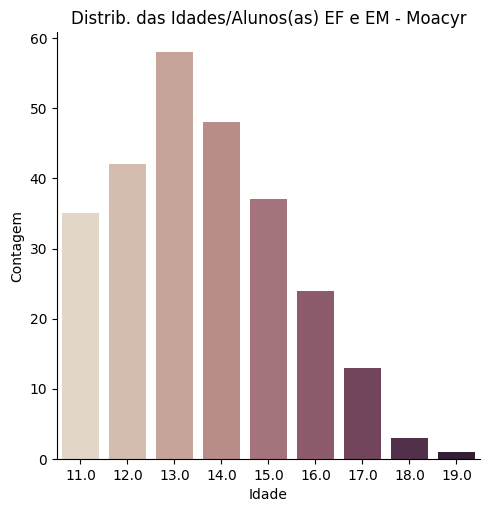

In [457]:
# Create a histogram of the "mpg" variable
sns.catplot(data=df, x="idade", kind="count", palette="ch:.25")

plt.title('Distrib. das Idades/Alunos(as) EF e EM - Moacyr')
plt.xlabel('Idade') 
plt.ylabel('Contagem') 

Text(0.5, 28.999999999999986, 'Contagem')

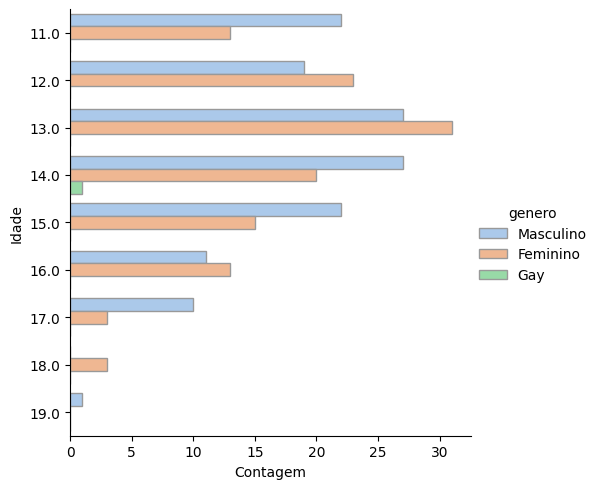

In [458]:
sns.catplot(
    data=df, y="idade", hue="genero", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.ylabel('Idade') 
plt.xlabel('Contagem') 

Text(0.5, 28.999999999999986, 'Contagem')

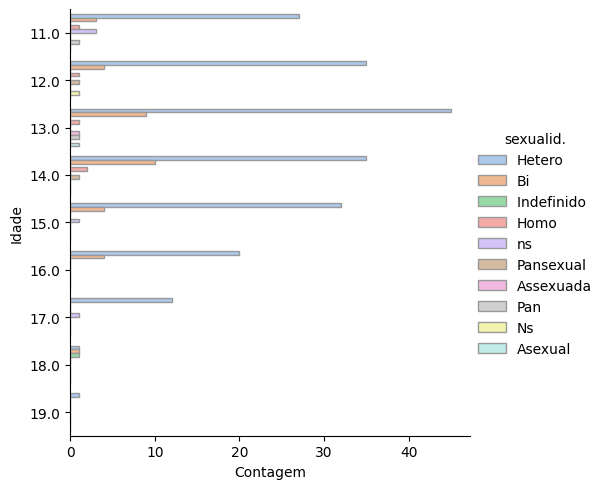

In [459]:
sns.catplot(
    data=df, y="idade", hue="sexualid.", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.ylabel('Idade') 
plt.xlabel('Contagem') 

Text(0.5, 28.999999999999986, 'Contagem')

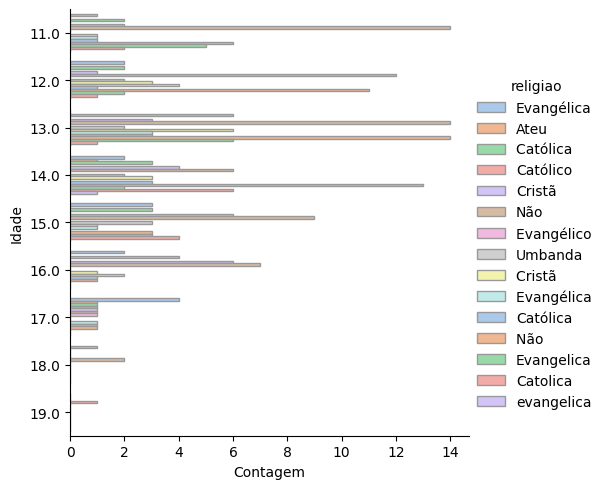

In [460]:
sns.catplot(
    data=df, y="idade", hue="religiao", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.ylabel('Idade') 
plt.xlabel('Contagem') 

Text(0.5, 28.999999999999986, 'Contagem')

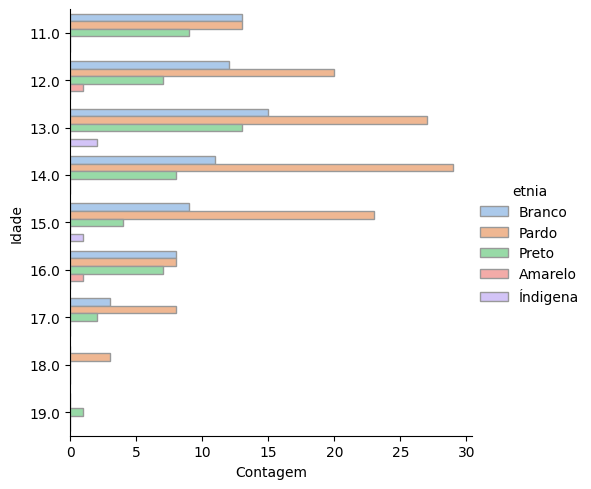

In [461]:
sns.catplot(
    data=df, y="idade", hue="etnia", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.ylabel('Idade') 
plt.xlabel('Contagem') 

In [462]:
# Generate the profile report
profile = ProfileReport(df)

# Display the report in a Jupyter Notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [463]:
profile.to_file("reports/exploring_data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]